In [1]:
import pandas as pd
import numpy as np

true = pd.read_csv("True.csv")
fake = pd.read_csv("Fake.csv")

# Analisis y visualización de datos


Debido a que las noticias 

En este caso el dataframe las columnas que me enfocare son titulo y texto

In [2]:
true.head(5)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [3]:
fake.head(5)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


#### Asigno labels correspondientes a df true y fake, donde 0 corresponde a noticias falsas y 1 a verdaderras

In [4]:
fake['label'] = 0 #Falsa
true['label'] = 1 #Verdadera

In [5]:
import seaborn as sns

In [6]:
visualizar = pd.concat([true,fake])

#### Aqui se puede ver de manera clara cuantas noticias verdaderas y falsas existen en los dataset

<AxesSubplot:xlabel='label', ylabel='count'>

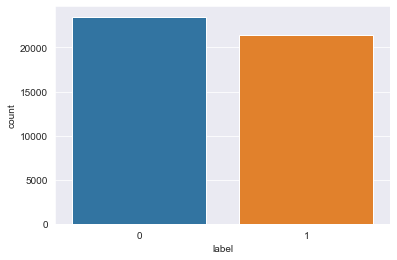

In [7]:
sns.set_style("darkgrid")
sns.countplot(x='label',data=visualizar)

# Limpieza de datos

#### Importo librerias display , simplemente para ver de manera mas clara los dataframe juntos


In [8]:
from IPython.display import display

In [9]:
display(true.head(5))
display(fake.head(5))

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


#### Ahora voy a extraer  4000 noticias para  generar un dataframe para crear mi modelo  en el cual 2000 son verdaderas y 2000 falsas, y para esto extraigo las 2000 primeras de los  dataset de noticias verdaderas y falsas 

In [10]:
true_dosmil = true.head(10000)
fake_dosmil = fake.head(10000)
df_principal = pd.concat([true_dosmil, fake_dosmil],ignore_index=True,sort=True)

In [11]:
display(df_principal.head(5))
print(df_principal.shape)

,date,label,subject,text,title
0,"December 31, 2017",1,politicsNews,WASHINGTON (Reuters) - The head of a conservat...,"As U.S. budget fight looms, Republicans flip t..."
1,"December 29, 2017",1,politicsNews,WASHINGTON (Reuters) - Transgender people will...,U.S. military to accept transgender recruits o...
2,"December 31, 2017",1,politicsNews,WASHINGTON (Reuters) - The special counsel inv...,Senior U.S. Republican senator: 'Let Mr. Muell...
3,"December 30, 2017",1,politicsNews,WASHINGTON (Reuters) - Trump campaign adviser ...,FBI Russia probe helped by Australian diplomat...
4,"December 29, 2017",1,politicsNews,SEATTLE/WASHINGTON (Reuters) - President Donal...,Trump wants Postal Service to charge 'much mor...


(20000, 5)


Elimino columnas que no me aportan segun lo antes visto

In [12]:
df_principal = df_principal.drop(['date','subject'],axis=1)

Ordeno los header de las columnas para que esten mas ordenados

In [13]:
df_principal = df_principal[['title','text','label']]

In [14]:
print('Dataframe para mi modelo ')
display(df_principal.head(5))
print(df_principal.shape,'<--- Cantidad de filas y columnas df_prinicpal')

Dataframe para mi modelo 


,title,text,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,1


(20000, 3) <--- Cantidad de filas y columnas df_prinicpal


Verifico si tengo datos nulos

In [15]:
print('Dataframe para mi modelo ')
display(df_principal.apply(lambda x: sum(x.isnull())))

Dataframe para mi modelo 


title    0
text     0
label    0
dtype: int64


#### Junto la primera y segunda columna que corresponde a el titulo  y  el texto

In [16]:
X = df_principal['title'] + " " + df_principal['text']
y = df_principal.label 

#### Creo una variable sin_limpiar para luego mostarar difrencias del texto limpio

In [17]:
noticia_sin_limpiar = X[0]

In [18]:
noticia_sin_limpiar

'As U.S. budget fight looms, Republicans flip their fiscal script WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non

##### Ahora importaremos las librerias de nltk que contienen diccionarios de palabras que necesitamos, para este caso las stopwords, que son las palabras conectoras que repetimos con frecuencia en un idioma, por ejemplo pronombres como el, la, los, e.o, o en ingles the,as,where,been etc.

In [19]:
from nltk.corpus import stopwords
import string

stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

def limpiar_stopwrods(dataframe):
    texto_limpio = []
    for i in dataframe.split():
        # Si la cadena de texto no esta en la stopwords(stop)
        #Entonces mando la cadena de texto sin las stopwords          
        if i.strip().lower() not in stop:
            texto_limpio.append(i.strip())
    return " ".join(texto_limpio)
X = X.apply(limpiar_stopwrods)

In [20]:
noticia_limpia = X[0]

Metodo que cree para ver si efectivamente se limpio de stopwords el texto

In [21]:
# Paso a lista mis stopwords
stw = list(stop)
str1 = noticia_sin_limpiar
str2 = noticia_limpia
# Texto con stopwords

def verificar_texto_limpio(texto1,texto2):
    count1=0
    print('Texto con stopwords')
    for i in stw:
        if i in list(texto1.split(" ")):
            print(i)
            count1+=1
    print('Stop words encontradas sin limpiar ',count1)
    #Texto sin stopwords
    print('Texto sin stopwords')
    count2=0
    for i in stw:
        if i in list(texto2.split(" ")):
            print(i)
            count2+=1
    print('Stop words encontradas limpio: ',count2)



In [22]:
verificar_texto_limpio(str1,str2)

Texto con stopwords
under
his
-
than
more
to
as
was
will
you
where
further
is
this
some
for
the
on
are
that
did
their
he
off
she
after
such
or
out
we
over
them
from
but
have
while
has
both
those
about
himself
of
been
do
not
which
they
be
by
with
in
who
other
a
an
and
Stop words encontradas sin limpiar  56
Texto sin stopwords
Stop words encontradas limpio:  0


In [23]:
print('Contenido a trabajar:')
display(X)
print('Mis labels:')
display(y)

Contenido a trabajar:


0        U.S. budget fight looms, Republicans flip fisc...
1        U.S. military accept transgender recruits Mond...
2        Senior U.S. Republican senator: 'Let Mr. Muell...
3        FBI Russia probe helped Australian diplomat ti...
4        Trump wants Postal Service charge 'much more' ...
                               ...                        
19995    LOL! SHAKEDOWN ARTIST JESSE JACKSON TELLS CROW...
19996    President First Lady Arrive Texas: Serve Food,...
19997    Heaven’s Gatekeeper? Jesse Jackson Proclaims T...
19998    First Lady Melania Trump Defies Critics…Rocks ...
19999    Watch Women’s March Activist: ‘Missing Black G...
Length: 20000, dtype: object

Mis labels:


0        1
1        1
2        1
3        1
4        1
        ..
19995    0
19996    0
19997    0
19998    0
19999    0
Name: label, Length: 20000, dtype: int64

# Preprocesamiento de datos

In [24]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)


In [48]:
print('Datos de entrenamiento')
display(X_train)
print('Datos de prueba')
display(X_test)

Datos de entrenamiento


17264    Sorry, Republicans, Workers Got Major Win Stat...
6957     Trump nominate retired General Mattis Pentagon...
3706     U.S. lawmaker unveils sweeping Pentagon acquis...
7220     China sees THAAD deployment 'weather vane' Tru...
4433     Schiff: Nunes decision leave probe Russia offe...
                               ...                        
3783     New U.S. trade envoy says meet lawmakers NAFTA...
9164     Obama calls Orlando nightclub shooting attack ...
9868     U.S. House committee votes smooth e-cigarette ...
18099    Conservative Christians Think Girls Crop, Marr...
14735    Mural Gov. LePage Wearing KKK Garb Maine City ...
Length: 16000, dtype: object

Datos de prueba


12040    WATCH: McCain Scorches Party’s Sham ‘Investiga...
14750    Effort Hawk Phyllis Schlafly’s Book, Trump Cal...
79       Trump aides hope win taxes stem slide poll num...
3054     Trump 'very supportive' Senate healthcare bill...
8844     U.S. House speaker asks Clinton denied classif...
                               ...                        
11532    Kellyanne Conway Threatens Media: It’s ‘Inappr...
11202    Karma Comes Trump, Congressional Committees Wa...
18243    Marco Rubio’s Attempt Sweet Talk Gay Voter New...
7391     election upset, Trump finds pockets Latino sup...
9940     Thornton, Arkansas congressman figured Nixon i...
Length: 4000, dtype: object

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(stop_words = 'english')

X_train_transformado = tfidf_vect.fit_transform(X_train)
X_test_transformado = tfidf_vect.transform(X_test)
tfidf_df = pd.DataFrame(X_train_transformado.A, columns=tfidf_vect.get_feature_names())

In [27]:
display(X_train_transformado)
display(X_test_transformado)

<16000x74051 sparse matrix of type '<class 'numpy.float64'>'
	with 2586800 stored elements in Compressed Sparse Row format>

<4000x74051 sparse matrix of type '<class 'numpy.float64'>'
	with 630296 stored elements in Compressed Sparse Row format>

#### Recordatorio 
<img src="tfmodelo.png">

####  Importamos nuestras librerias para relizar metricas

In [28]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score,roc_curve,roc_auc_score
import matplotlib.pyplot as plt

In [29]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB() 
# Le entrego los datos a mi modelo 
MNB.fit(X_train_transformado, y_train)                     
pred = MNB.predict(X_test_transformado)                     
score = metrics.accuracy_score(y_test, pred)

In [30]:
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))
MNB_f1 = round(f1_score(y_test, pred, average='weighted'), 3)
MNB_accuracy = round((accuracy_score(y_test, pred)*100),2)

print("Precision : " , MNB_accuracy , " %")
print("f1_score : " , MNB_f1)


              precision    recall  f1-score   support

           0       0.96      0.93      0.94      1998
           1       0.93      0.96      0.94      2002

    accuracy                           0.94      4000
   macro avg       0.94      0.94      0.94      4000
weighted avg       0.94      0.94      0.94      4000

[[1851  147]
 [  87 1915]]
Precision :  94.15  %
f1_score :  0.941


In [31]:
probs_mnb = MNB.predict_proba(X_test_transformado)
probs_mnb = probs_mnb[:, 1]
auc = roc_auc_score(y_test, probs_mnb)  
print('AUC: %.2f' % auc) 

AUC: 0.99


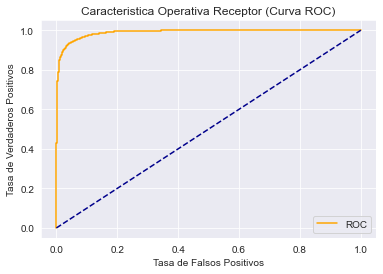

In [32]:
fpr, tpr, thresholds = roc_curve(y_test, probs_mnb) 
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Caracteristica Operativa Receptor (Curva ROC)')
plt.legend()
plt.show()

In [33]:
X_test_transformado

<4000x74051 sparse matrix of type '<class 'numpy.float64'>'
	with 630296 stored elements in Compressed Sparse Row format>

In [34]:
y_test

12040    0
14750    0
79       1
3054     1
8844     1
        ..
11532    0
11202    0
18243    0
7391     1
9940     1
Name: label, Length: 4000, dtype: int64

# RandomForestClassifier

In [35]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
RFC.fit(X_train_transformado, y_train)
y_pred_rfc = RFC.predict(X_test_transformado)



print(classification_report(y_test, y_pred_rfc))
print(confusion_matrix(y_test, y_pred_rfc))

rfc_f1 = round(f1_score(y_test, y_pred_rfc, average='weighted'), 3)
rfc_accuracy = round((accuracy_score(y_test, y_pred_rfc)*100),2)

print("Precision : " , rfc_accuracy , " %")
print("f1_score : " , rfc_f1)


              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1998
           1       0.97      0.98      0.98      2002

    accuracy                           0.98      4000
   macro avg       0.98      0.98      0.98      4000
weighted avg       0.98      0.98      0.98      4000

[[1942   56]
 [  36 1966]]
Precision :  97.7  %
f1_score :  0.977


In [36]:
probs_rfc = RFC.predict_proba(X_test_transformado)
probs_rfc = probs_rfc[:, 1]
auc = roc_auc_score(y_test, probs_rfc)  
print('AUC: %.2f' % auc) 


AUC: 1.00


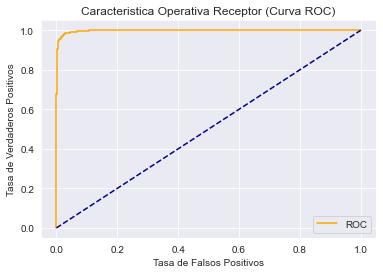

In [37]:
fpr, tpr, thresholds = roc_curve(y_test, probs_rfc) 
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Caracteristica Operativa Receptor (Curva ROC)')
plt.legend()
plt.show()

In [38]:
import pickle

nombre_archivo = 'randomforestIngles.sav'
pickle.dump(RFC, open(nombre_archivo, 'wb'))



In [39]:
nombre_archivo_ds = 'stringtomatrizIngles.sav'
pickle.dump(tfidf_vect, open(nombre_archivo_ds, 'wb'))


In [40]:
loaded_model = pickle.load(open(nombre_archivo, 'rb'))
load_model_matriz = pickle.load(open(nombre_archivo_ds, 'rb'))

In [41]:
noticia_test = 'breaking melania trumps immigration records made public show trumps ultimate hypocrisy addicting info knowledge crave november pm appearing concert hillary clinton ohio alongside chance rapper big sean husband jay z beyoncé let us know shes explaining happy nephew got barack obama look know could one day president beyoncé explained election continuing path progress explained gender goes beyond religion race electing first woman president something wants daughter said want daughter grow seeing woman lead country know possibilities limitless electing hillary clinton would break mold united states led men since inception however thats clearly reason elect hillary far qualified person run president united states century watch beyoncé explain shes want daughter grow seeing woman lead country know possibilities limitless beyonce imwithher pictwittercomexrjnqij khary penebaker kharyp november featured photo justin sullivangetty images share article author sarah sarah liberal writer whos writing commenting politics years opinionated democrat facebook also founder editorinchief online satirical publication free wood post search'

In [42]:
testdta = pd.Series([noticia_test])

In [43]:
a_predecir = load_model_matriz.transform(testdta)

In [44]:
a_predecir

<1x74051 sparse matrix of type '<class 'numpy.float64'>'
	with 108 stored elements in Compressed Sparse Row format>

In [45]:
tes = loaded_model.predict(a_predecir)

In [46]:
tes[0]

0

In [47]:
import numpy
import sklearn
import threadpoolctl
import joblib
import scipy
import nltk
print('sklearn',sklearn.__version__)
print('Pandas',pd.__version__)
print('threadpoolctl',threadpoolctl.__version__)
print('Numpy',numpy.__version__)
print('joblib',joblib.__version__)
print('scipy',scipy.__version__)
print('nltk',nltk.__version__)

sklearn 0.23.2
Pandas 1.1.3
threadpoolctl 2.1.0
Numpy 1.19.2
joblib 0.17.0
scipy 1.5.2
nltk 3.5
